# Code for creating MIDI files from images

In [207]:
# Importing packages like MIDIUtil for use with
# MIDI file creation from an image file
from midiutil import MIDIFile
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
# Function definitions for formatting image files
# and creating midi from the images

# Initial variable values for use with MIDIUtil
track    = 0
channel  = 0
time     = 0    # In beats
duration = 1    # In beats
tempo    = 60   # In BPM
volume   = 100  # 0-127, as per the MIDI standard

midi_array=[]

def create_midi(img_array, filename="test_file"):
  track    = 0
  channel  = 0
  time     = 0    # In beats
  duration = 1    # In beats
  tempo    = 60   # In BPM
  constant_volume   = 100  # 0-127, as per the MIDI standard

  MusicMIDI = MIDIFile(1)  # One track
  MusicMIDI.addTempo(track, time, tempo)

  for note,row in enumerate(img_array):
    start_time = 0
    total_vol = 0
    for time,value in enumerate(row):
      #print("DEBUG: Running on note,time,value: ",note,time,value)
      if value != 0:
        if start_time == 0:
          start_time = time
          total_vol += value
        else:
          total_vol += value
      elif value == 0:
        if start_time != 0:
          duration = int(time - start_time)
          volume = int(round(total_vol/duration))
          if volume > 255:
            volume = 255
          midi_array.append([track,channel,note,start_time,duration,volume])
          #print("MIDI - track,ch,note,start,dur,vol: ",track,channel,note,start_time,duration,volume)
          if volume > 5:
            MusicMIDI.addNote(track,channel,note,start_time,duration,constant_volume)
          #MusicMIDI.addNote(track,channel,note,start_time,duration,volume) # Changed for thresholding
          start_time = 0
          total_vol = 0
    #print("DEBUG: Reached end of notes for pitch ",note)
    if start_time != 0:
      duration = int(len(row) - start_time)
      if duration < 1:
        duration = 1
      volume = int(round(total_vol/duration))
      if volume > 255:
        volume = 255
      elif volume < 1:
        volume = 1
      #MusicMIDI.addNote(track,channel,note,start_time,duration,volume)
      MusicMIDI.addNote(track,channel,note,start_time,duration,constant_volume)
      start_time = 0
      total_vol = 0
      
  with open(filename+".mid", "wb") as output_file:
      MusicMIDI.writeFile(output_file)    

def create_img_array(filepath):
  img = Image.open(filepath).convert('L')
  img_resized = img.resize((512,128),resample=0)
  img_array = np.asarray(img_resized)
  return img_array

# Run both image array creation and midi generation
def image_to_midi(inpath, outfile):
  create_midi(create_img_array(inpath),outfile)

In [212]:
image_to_midi('img/dcgan_rory_1.png','dcgan_rory_1')

# Test code

In [209]:
# Import a test image and visualize in notebook
img = Image.open('img/music_galaxy.png').convert('L')
img_resized = img.resize((1000,128),resample=0)
img_array = img.getdata()

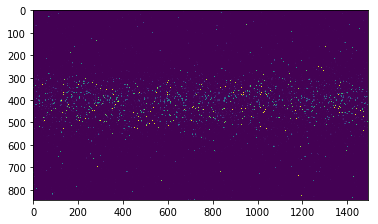

In [89]:
plt.imshow(img_array)
plt.show()

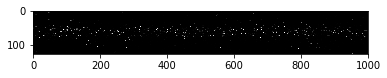

In [90]:
plt.imshow(img_resized)
plt.show()

In [201]:
img_array = np.asarray(img_resized)
print(img_array.shape)

(128, 1000)


In [160]:
new_array = create_img_array('img/music_galaxy_2.png')
create_midi(new_array,"galaxy_2")

In [177]:
tmp_img = Image.open('img/wide_galaxy_2.png').convert('L')

In [192]:
ben_img = Image.open('img/BEN_TEST_BLACK.png').convert('L')
ben_img = ben_img.resize((1000,128),resample=0)
ben_img = np.asarray(ben_img)
print(ben_img.shape)
create_midi(ben_img,"ben_song")


(128, 1000)


In [205]:
for note,row in enumerate(img_array):
  if note == -1:
    print(note,row)